In [37]:
# Import library that used in this program
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import AdaBoostClassifier #AdaBoost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import xgboost as xgb #XgBoost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

In [38]:
df = pd.read_csv('/content/creditcard.csv')

In [39]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [40]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [41]:
df.shape

(284807, 31)

In [42]:
# Separate Atribut And Features
X, y = df.iloc[:, :-1], df.iloc[:, [-1]]

In [43]:
import numpy as np
import seaborn as sns

In [44]:
X.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3  0.647376 -0.221929  0.062723  0.061458  123.50  
4 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 30 columns]

In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X = scaler.fit_transform(X)

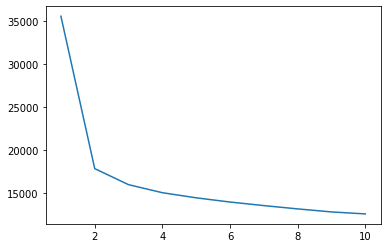

In [46]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [47]:
KMeans = KMeans(n_clusters=6)

In [48]:
label = KMeans.fit_predict(X)

In [49]:
df['Klaster'] = label

In [50]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Class  Klaster  
0  0.133558 -0.021053  149.62      0        5  
1 -0.008983  0.014724    2.69      0        5  
2 -0.055353 -0.059752  378.66      0        5  
3  0.062723  0.061458  123.50      0        5  
4  0.219422  0.215153   69.99      0        5  

[5 rows x 32 columns]

In [52]:
df_klaster = df.groupby(['Klaster','Class'])['Class'].sum()

In [53]:
df_klaster

Klaster  Class
0        0          0
         1         59
1        0          0
         1         92
2        0          0
         1         77
3        0          0
         1         81
4        0          0
         1         73
5        0          0
         1        110
Name: Class, dtype: int64